In [1]:
import numpy as np
import pandas as pd
from matplotlib import gridspec
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator
from cycler import cycler
import yaml

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
cm = 1/2.54 #to size the figure in cm

In [3]:
# load styles

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


#### Import efficiency data

In [5]:
sgsc_eff=pd.read_csv('data/eff_sgsc_1sun_AM15G.csv', delimiter=',', header=None)
eff_gaps=pd.read_excel('data/effs and gaps.xlsx', header=0, index_col=0)
eff_gaps

,eff (%),gap (eV),marker
technology,,,
a-Si,10.2,1.75,^
c-Si,26.8,1.12,>
CdTe,22.3,1.50,v
CIGS,23.6,1.15,X
dye-sensitized,13.0,1.74,P
GaAs,29.1,1.42,o
organic,19.2,1.41,<
perovskite,26.0,1.52,d
quantum-dot,16.6,1.65,s


In [6]:
markers=eff_gaps.loc[:, 'marker']
markers

technology
a-Si              ^
c-Si              >
CdTe              v
CIGS              X
dye-sensitized    P
GaAs              o
organic           <
perovskite        d
quantum-dot       s
Name: marker, dtype: object

#### Plot

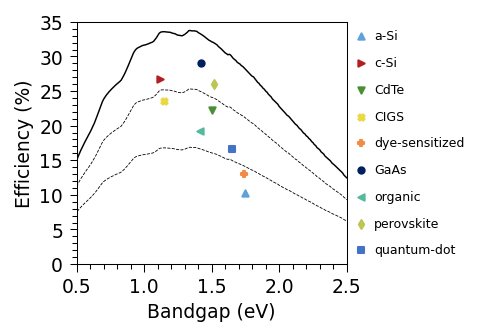

In [66]:
fig = plt.figure(figsize=(7.7*cm, 5.2*cm), dpi=DPI_PLOT)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.0])

ax0 = fig.add_subplot(gs[0])

ax0.plot(sgsc_eff[0], sgsc_eff[1]*100, 'k')
ax0.plot(sgsc_eff[0], sgsc_eff[1]*75, 'k--', lw=0.4)
ax0.plot(sgsc_eff[0], sgsc_eff[1]*50, 'k--', lw=0.4)


for tech, m in zip(eff_gaps.index, markers):
    x, y = eff_gaps.loc[tech, 'gap (eV)'], eff_gaps.loc[tech, 'eff (%)']
    ax0.scatter(x,y, s=9, zorder=9, marker=m, label=tech)
    #ax.annotate(tech, [x,y], [1.1*x,1.1*y], xycoords='data', s=8) 
#text, xy, xytext=None, xycoords='data', textcoords=None
        
ax0.set_xlabel("Bandgap (eV)")
ax0.set_xlim([0.5, 2.5])
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.xaxis.set_tick_params(direction='out', which='both')

ax0.set_ylabel("Efficiency (%)")
ax0.set_ylim([0, 35])
ax0.set_yticks(np.arange(0,36,5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_tick_params(direction='out', which='both')

ax0.legend(loc=[0.99,0.01],labelspacing = 1.1, handletextpad=0.02, fontsize=6)

ax1 = fig.add_subplot(gs[1])
ax1.axis('off')

plt.tight_layout(pad=0.01)

#plt.savefig ('./SQ_limit.png', dpi=DPI_SAVE)